         X1        X2        X3        X4        X5        X6           y
0 -0.651836  0.047399 -0.860413 -0.384556  1.006293 -0.576892  -92.281234
1 -1.377669 -0.937825  0.515035  0.513786  0.515048  3.852731  -66.831087
2  0.097078  0.968645 -0.702053 -0.327662 -0.392108 -1.463515   33.441254
3  1.451144  0.959271  2.153182 -0.767348  0.872321  0.183342  285.359901
4 -0.828995 -0.560181  0.747294  0.610370 -0.020902  0.117327  -21.638387
5  0.280992 -0.622700 -0.208122 -0.493001 -0.589365  0.849602  -73.862261
6 -0.646573 -1.081548  1.687142  0.881640 -0.007973  1.479944   13.976203
7  1.586017 -1.237815  2.133033 -1.952088 -0.151785  0.588317   63.646206
8  0.199060 -0.600217  0.069802 -0.385314  0.113517  0.662131  -12.152144
9  1.644968 -0.249036  0.576557  0.311250  3.078881  1.119575   61.838303
Relative importance of the features:  [0.04456474 0.46799135 0.42958456 0.01764417 0.02400328 0.0162119 ]
Regression coefficient: 0.9559310887485661


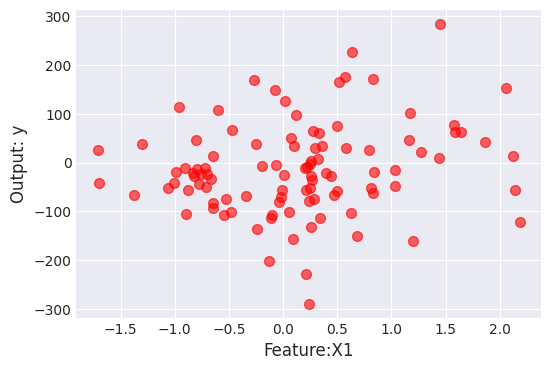

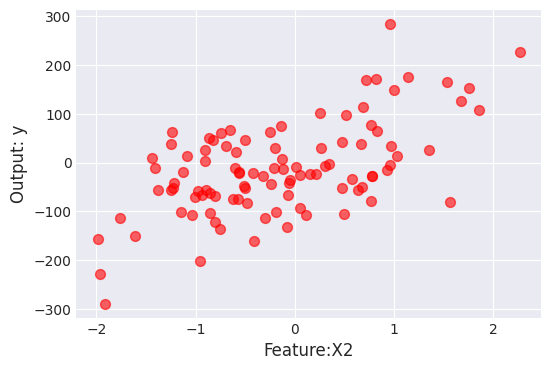

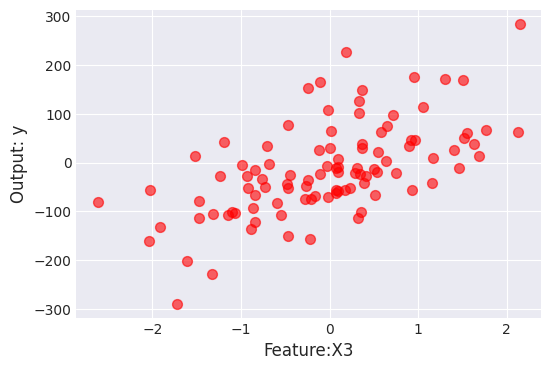

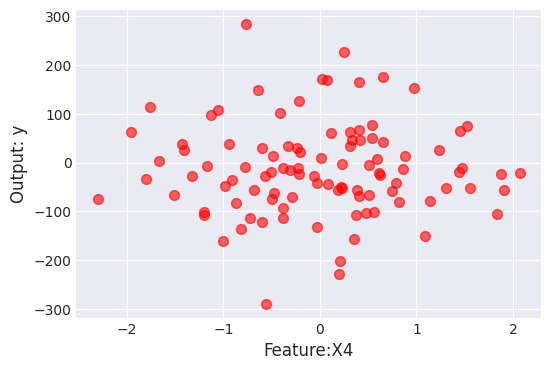

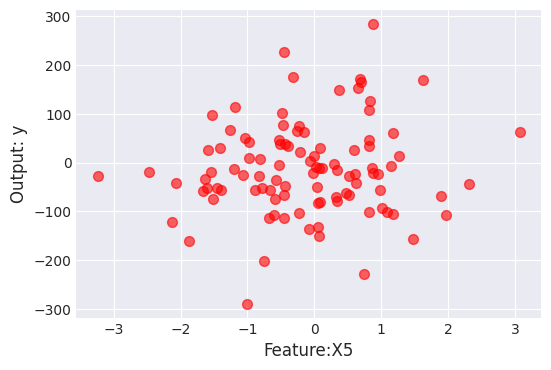

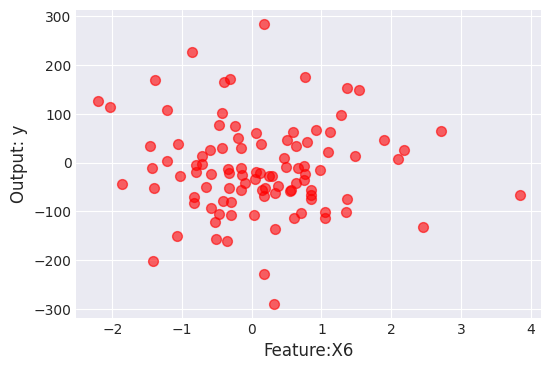

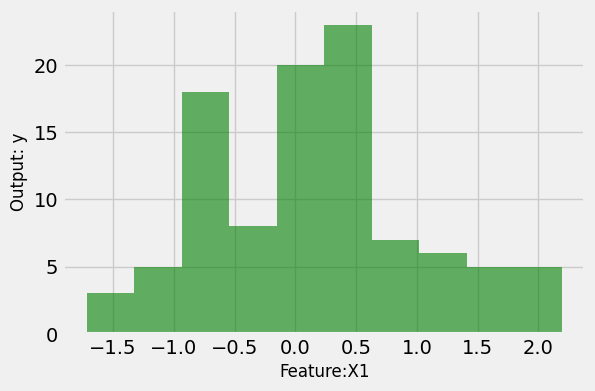

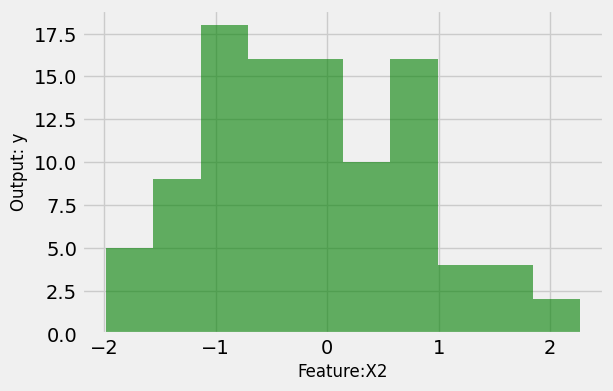

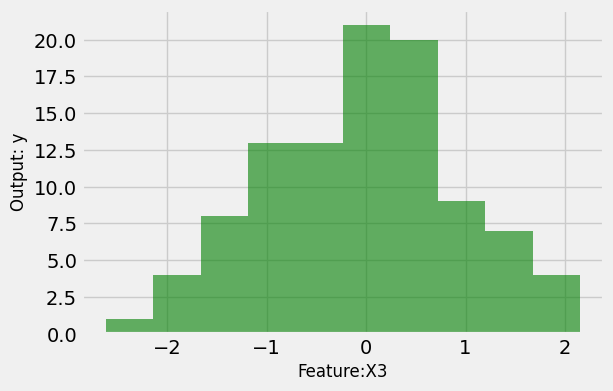

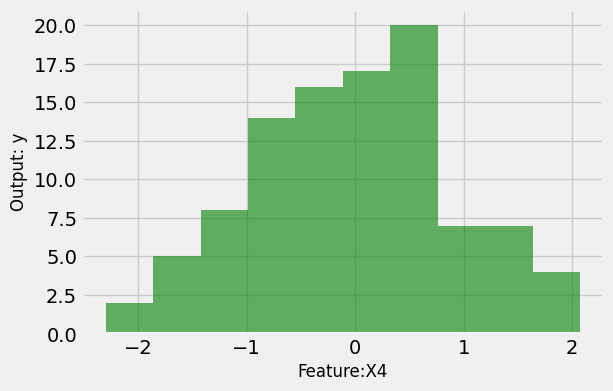

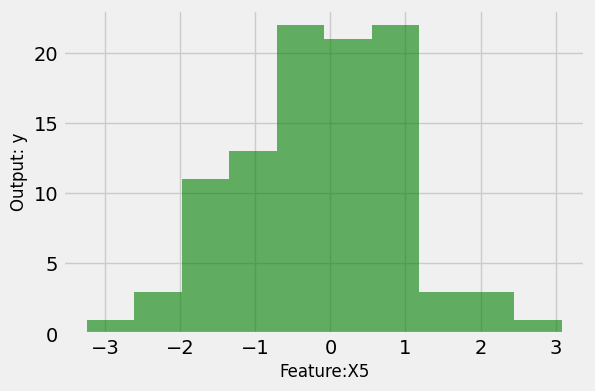

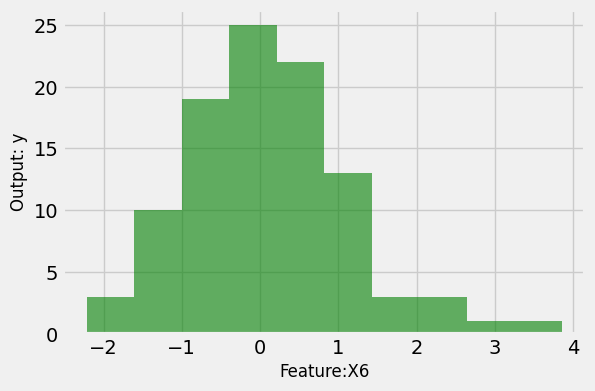

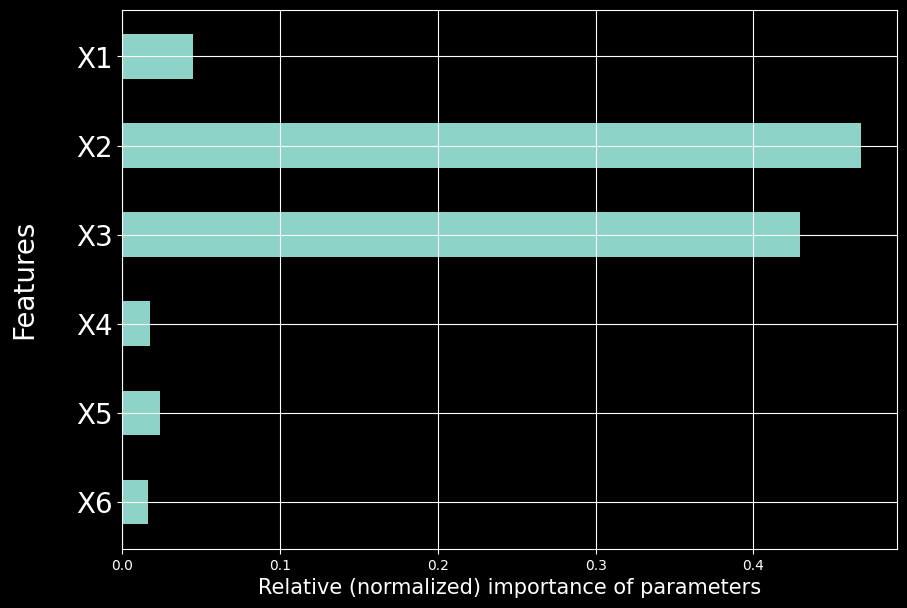

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

n_samples = 100
n_features = 6
n_informative = 3

# Generate artificial data samples
X, y, coef = make_regression(n_samples=n_samples, n_features=n_features, n_informative=n_informative,
                              random_state=None, shuffle=False, noise=20, coef=True)

# Shuffle data indices
indices = np.random.permutation(n_samples)

# Shuffle data using shuffled indices
X_shuffled = X[indices]
y_shuffled = y[indices]

df1 = pd.DataFrame(data=X_shuffled, columns=['X'+str(i) for i in range(1, n_features+1)])
df2 = pd.DataFrame(data=y_shuffled, columns=['y'])
df = pd.concat([df1, df2], axis=1)
print(df.head(10))

# Scatter plots
with plt.style.context(('seaborn-dark')):
    for i, col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6, 4))
        plt.grid(True)
        plt.xlabel('Feature:'+col, fontsize=12)
        plt.ylabel('Output: y', fontsize=12)
        plt.scatter(df[col], df['y'], c='red', s=50, alpha=0.6)

# Histograms
with plt.style.context(('fivethirtyeight')):
    for i, col in enumerate(df.columns[:-1]):
        plt.figure(figsize=(6, 4))
        plt.grid(True)
        plt.xlabel('Feature:'+col, fontsize=12)
        plt.ylabel('Output: y', fontsize=12)
        plt.hist(df[col], alpha=0.6, facecolor='g')

# Initialize RandomForestRegressor with regularization parameters
model = RandomForestRegressor(max_depth=5, random_state=42, n_estimators=50)

# Fit the model
model.fit(X_shuffled, y_shuffled)

# Print relative importance of features
print("Relative importance of the features: ", model.feature_importances_)

# Plot feature importance
with plt.style.context('dark_background'):
    plt.figure(figsize=(10, 7))
    plt.grid(True)
    plt.yticks(range(n_features+1, 1, -1), df.columns[:-1], fontsize=20)
    plt.xlabel("Relative (normalized) importance of parameters", fontsize=15)
    plt.ylabel("Features\n", fontsize=20)
    plt.barh(range(n_features+1, 1, -1), width=model.feature_importances_, height=0.5)

# Print regression coefficient
print("Regression coefficient:", model.score(X_shuffled, y_shuffled))


Logical Error:
The logical error in the code is that it shuffles both the features (`X`) and the target variable (`y`) separately after generating the artificial dataset using `make_regression()`. Shuffling `y` independently from `X` will disrupt the relationship between features and labels, leading to incorrect results.

Solution:
The correct approach is to shuffle the data (`X` and `y`) together, so that the relationship between features and labels remains intact. This can be achieved by shuffling the indices and then using these shuffled indices to shuffle both `X` and `y` simultaneously.

Overfitting Issue:
The overfitting issue arises due to several factors:
1. Using too many estimators (`n_estimators=100`) in the RandomForestRegressor can lead to overfitting, especially on a small dataset.
2. Insufficient regularization: The RandomForestRegressor is not given any constraints on the complexity of individual trees (e.g., via `max_depth` or `min_samples_split`), which can result in overfitting.

Solution to Prevent Overfitting:
1. Reduce the number of estimators (`n_estimators`) to a more reasonable value. A smaller number of trees can reduce overfitting.
2. Introduce regularization parameters such as `max_depth`, `min_samples_split`, or `max_features` to limit the complexity of individual trees and prevent overfitting.